In [1]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import os
import shutil
import random
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

Using TensorFlow backend.


In [2]:
if os.path.isdir('data/test/0') is False:
    os.makedirs('test/0')
    os.makedirs('test/1')
    os.makedirs('test/2')
    os.makedirs('test/3')
    
    
    for c in random.sample(glob.glob('train/0/img*'),10):
        shutil.move(c,'test/0')
    
    
    for c in random.sample(glob.glob('train/1/img*'),10):
        shutil.move(c,'test/1')
    
    
    for c in random.sample(glob.glob('train/2/img*'),10):
        shutil.move(c,'test/2')
    
    
    for c in random.sample(glob.glob('train/3/img*'),10):
        shutil.move(c,'test/3')
    

In [2]:
train_path='data/train'
test_path='data/test'
valid_path='data/validation'

In [3]:
train_batches=ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['0','1','2','3'], batch_size=10)
test_batches=ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['0','1','2','3'], batch_size=10)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['0','1','2','3'], batch_size=10)

Found 297 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


(10, 224, 224, 3) 



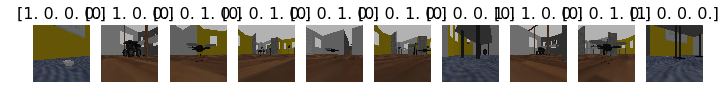

In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        

imgs, labels = next(train_batches)
plots(imgs, titles=labels)
print(imgs.shape,'\n')

In [5]:
batch_size_val=50
steps_per_epoch_val=2000
epochs_val=30
imageDimensions=(32,32,3)

def myModel():
    no_of_Filters=60
    size_of_Filter=(5,5)
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)
    no_of_Nodes=500
    model=Sequential()
    model.add((Conv2D(no_of_Filters,size_of_Filter,input_shape=(224,224,3),activation='relu')))
    model.add((Conv2D(no_of_Filters,size_of_Filter,activation='relu')))
    model.add(MaxPool2D(pool_size=size_of_pool))
    
    model.add((Conv2D(no_of_Filters,size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_of_Filters,size_of_Filter2,activation='relu')))
    model.add(MaxPool2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(no_of_Nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4,activation='softmax'))
        
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model=myModel()
model.summary()
history=model.fit_generator(train_batches, steps_per_epoch=100, validation_data=valid_batches, validation_steps=4, epochs=10, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 60)      4560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 60)      90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 60)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 60)      32460     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 104, 104, 60)      32460     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 60)        0         
_________________________________________________________________
dropout (Dropout)            (None, 52, 52, 60)        0         
__________